1. How to load data?
2. How to work on csv / tsv file?
3. Basic Statistics on Data.
4. Data Cleaning with each column.
5. Choice description
6. Regular Expression
7. Solve some questions from dataset.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd


## Read Data

In [11]:
df = pd.read_csv("/content/chipotle.tsv",sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [15]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Displaying the results
print("Missing Values:\n", missing_values)


Missing Values:
 order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [17]:
df = df.dropna()

1. Missing Values

In [20]:
# Displaying the column names
print("Column Names:\n", df.columns)

# Checking for missing values in each column
missing_values = df.isnull().sum()

# Displaying the results
print("Missing Values:\n", missing_values)

# Assuming the correct column names are 'quantity' and 'choice_description'
# Fill missing values in a numeric column with the mean
df['quantity'].fillna(df['quantity'].mean(), inplace=True)

# Fill missing values in a non-numeric column with a placeholder
df['choice_description'].fillna('No description', inplace=True)


Column Names:
 Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
Missing Values:
 order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


2. Data Types

In [21]:
data_types = df.dtypes
print("Data Types:\n", data_types)


Data Types:
 order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


3. Duplicated Entries

In [22]:
duplicates = df.duplicated().sum()
# Display the number of duplicated entries
print("Number of Duplicated Entries:", duplicates)
# Drop duplicates
df.drop_duplicates(inplace=True)
# Display the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)

Number of Duplicated Entries: 59
Shape of DataFrame after removing duplicates: (4563, 5)


4. Quantity and Item Price

In [27]:
# Displaying summary statistics for Quantity and Item Price columns
print("Summary Statistics for Quantity:\n", df['quantity'].describe())
print("\nSummary Statistics for Item Price:\n", df['item_price'].describe())

# Checking for unique values and their counts in Quantity and Item Price columns
print("\nUnique Values and Counts for Quantity:\n", df['quantity'].value_counts())
print("\nUnique Values and Counts for Item Price:\n", df['item_price'].value_counts())



Summary Statistics for Quantity:
 count    4563.000000
mean        1.076704
std         0.412739
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

Summary Statistics for Item Price:
 count       4563
unique        78
top       $8.75 
freq         719
Name: item_price, dtype: object

Unique Values and Counts for Quantity:
 1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: quantity, dtype: int64

Unique Values and Counts for Item Price:
 $8.75      719
$11.25     516
$9.25      395
$4.45      344
$8.49      308
          ... 
$13.35       1
$7.50        1
$4.36        1
$32.94       1
$11.49       1
Name: item_price, Length: 78, dtype: int64


In [35]:
df['item_price'] = df['item_price'].astype(str)

# Remove the dollar sign and convert to numeric
df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')

# Display the updated DataFrame
print(df.head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                     No description        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                     No description        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


<ipython-input-35-b965c58e9ac6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')


5. Choice Description

In [49]:
import pandas as pd

# Read the TSV file with correct column names
df = pd.read_csv('chipotle.tsv', sep='\t')

# Concatenate descriptions (assuming 'Item Name' column exists)
df['Choice Description'] = df.groupby('Item Name')['Choice Description'].transform(lambda x: ', '.join(x))


KeyError: ignored

6. Handling Special Characters:


In [50]:

special_chars_item_name = df[df['item_name'].str.contains(r'[^\w\s]', na=False)]

# Check for special characters in the 'choice_description' column
special_chars_choice_description = df[df['choice_description'].str.contains(r'[^\w\s]', na=False)]

# Display rows with special characters in 'item_name' and 'choice_description'
print("Rows with Special Characters in 'item_name':\n", special_chars_item_name)
print("\nRows with Special Characters in 'choice_description':\n", special_chars_choice_description)


Rows with Special Characters in 'item_name':
       order_id  quantity                              item_name  \
3            1         1  Chips and Tomatillo-Green Chili Salsa   
15           8         1  Chips and Tomatillo-Green Chili Salsa   
30          15         1  Chips and Tomatillo-Green Chili Salsa   
113         50         1  Chips and Tomatillo-Green Chili Salsa   
133         58         1  Chips and Tomatillo-Green Chili Salsa   
...        ...       ...                                    ...   
3810      1527         1  Chips and Tomatillo-Green Chili Salsa   
3871      1552         1  Chips and Tomatillo-Green Chili Salsa   
3905      1565         1     Chips and Roasted Chili-Corn Salsa   
4007      1604         1  Chips and Tomatillo-Green Chili Salsa   
4088      1637         1    Chips and Tomatillo-Red Chili Salsa   

     choice_description item_price  
3                   NaN     $2.39   
15                  NaN     $2.39   
30                  NaN     $2.39   
1

7. Order Id Integrity

In [53]:
order_id_counts = df['order_id'].value_counts()
# Display unique values and their counts in 'order_id'
print("Unique Order IDs and Their Counts:\n", order_id_counts)
# Check for any non-numeric values or patterns in 'order_id'
non_numeric_order_ids = df[~df['order_id'].astype(str).str.isnumeric()]
# Display rows with non-numeric 'order_id'
print("\nRows with Non-Numeric Order ID:\n", non_numeric_order_ids)


Unique Order IDs and Their Counts:
 926     23
1483    14
205     12
759     11
1786    11
        ..
768      1
341      1
1048     1
94       1
1199     1
Name: order_id, Length: 1834, dtype: int64

Rows with Non-Numeric Order ID:
 Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


8. Item Name Standardization

In [54]:
print("Unique Item Names:\n", df['item_name'].unique())

# Create a mapping for standardization (add more mappings as needed)
item_name_mapping = {
    'Chicken Bowl': 'Chicken Bowl',
    'Steak Burrito': 'Steak Burrito',
    'Chips and Guacamole': 'Chips and Guacamole',
    # Add more mappings for other variations
}

# Standardize the 'item_name' column
df['standardized_item_name'] = df['item_name'].map(item_name_mapping)

# Display unique values in the standardized column
print("\nUnique Standardized Item Names:\n", df['standardized_item_name'].unique())


Unique Item Names:
 ['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and TomatilloGreen Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted ChiliCorn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and TomatilloRed Chili Salsa' 'Bowl' 'Burrito'
 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Sa

9. Quantity and Price Relationships

<ipython-input-55-1dce672fe0ad>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')


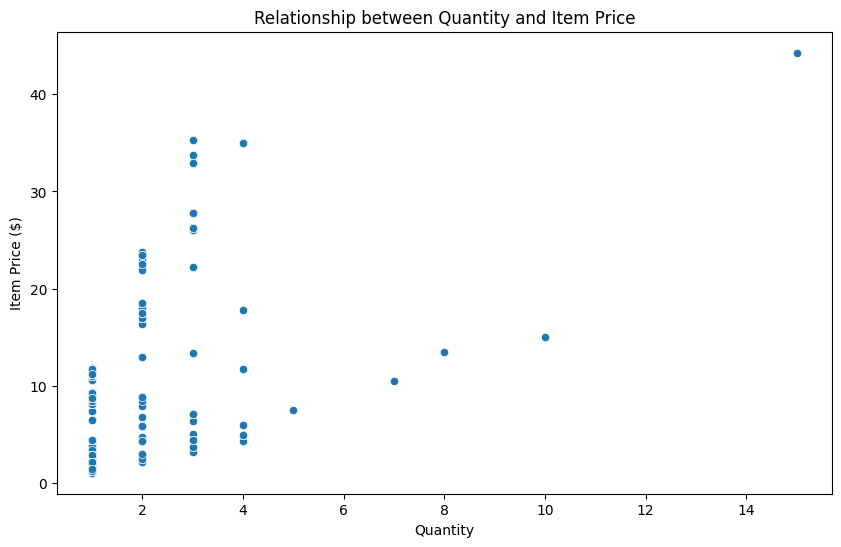


Summary Statistics for Quantity:
 count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

Summary Statistics for Item Price:
 count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')

# Scatter plot to visualize the relationship between Quantity and Item Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='item_price', data=df)
plt.title('Relationship between Quantity and Item Price')
plt.xlabel('Quantity')
plt.ylabel('Item Price ($)')
plt.show()

# Display summary statistics for Quantity and Item Price
print("\nSummary Statistics for Quantity:\n", df['quantity'].describe())
print("\nSummary Statistics for Item Price:\n", df['item_price'].describe())


10. Data Integrity Check

In [57]:
# Group by item name and choice description and check the consistency of quantities and prices
integrity_check = df.groupby(['item_name', 'choice_description']).agg({
    'quantity': 'sum',
    'item_price': 'mean'
}).reset_index()

# Display rows where the calculated quantity and mean item price do not match the original data
inconsistent_rows = df.merge(integrity_check, on=['item_name', 'choice_description'], how='left', suffixes=('_original', '_calculated'))
inconsistent_rows = inconsistent_rows[~((inconsistent_rows['quantity_original'] == inconsistent_rows['quantity_calculated']) &
                                        (inconsistent_rows['item_price_original'] == inconsistent_rows['item_price_calculated']))]

print("Inconsistent Rows:\n", inconsistent_rows)


Inconsistent Rows:
       order_id  quantity_original                             item_name  \
0            1                  1          Chips and Fresh Tomato Salsa   
1            1                  1                                  Izze   
2            1                  1                      Nantucket Nectar   
3            1                  1  Chips and TomatilloGreen Chili Salsa   
5            3                  1                          Chicken Bowl   
...        ...                ...                                   ...   
4617      1833                  1                         Steak Burrito   
4618      1833                  1                         Steak Burrito   
4619      1834                  1                    Chicken Salad Bowl   
4620      1834                  1                    Chicken Salad Bowl   
4621      1834                  1                    Chicken Salad Bowl   

                                     choice_description  item_price_original  \

11. Converting to CSV

In [60]:
# Assuming df is the cleaned DataFrame
cleaned_file_path = "/content/cleaned_chipotle.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset has been saved to:", cleaned_file_path)


Cleaned dataset has been saved to: /content/cleaned_chipotle.csv


12. Handling Categorical Data

In [61]:
df = pd.read_csv("/content/chipotle.tsv", sep='\t')

# One-hot encode the 'item_name' column
df_encoded = pd.get_dummies(df, columns=['item_name'], prefix='item')

# Display the resulting DataFrame with one-hot encoding
print(df_encoded.head())


   order_id  quantity                                 choice_description  \
0         1         1                                                NaN   
1         1         1                                       [Clementine]   
2         1         1                                            [Apple]   
3         1         1                                                NaN   
4         2         2  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...   

  item_price  item_6 Pack Soft Drink  item_Barbacoa Bowl  \
0     $2.39                        0                   0   
1     $3.39                        0                   0   
2     $3.39                        0                   0   
3     $2.39                        0                   0   
4    $16.98                        0                   0   

   item_Barbacoa Burrito  item_Barbacoa Crispy Tacos  \
0                      0                           0   
1                      0                           0   
2             

13. Consistent Quantity and Price Units

In [66]:
# Display unique values in the 'quantity' column
print("Unique Quantity Values:\n", df['quantity'].unique())
# Display unique values in the 'item_price' column
print("Unique Item Price Values:\n", df['item_price'].unique())
# Verify consistency in 'quantity' and 'item_price' columns
print("Unique Quantity Values After Adjustment:\n", df['quantity'].unique())
print("Unique Item Price Values After Adjustment:\n", df['item_price'].unique())

Unique Quantity Values:
 [ 1  2  3  4  5 15  7  8 10]
Unique Item Price Values:
 ['$2.39 ' '$3.39 ' '$16.98 ' '$10.98 ' '$1.69 ' '$11.75 ' '$9.25 '
 '$4.45 ' '$8.75 ' '$11.25 ' '$8.49 ' '$2.18 ' '$8.99 ' '$1.09 ' '$2.95 '
 '$2.15 ' '$3.99 ' '$22.50 ' '$11.48 ' '$17.98 ' '$17.50 ' '$4.30 '
 '$5.90 ' '$1.25 ' '$23.78 ' '$6.49 ' '$11.08 ' '$1.50 ' '$22.16 '
 '$32.94 ' '$22.20 ' '$10.58 ' '$2.50 ' '$23.50 ' '$7.40 ' '$18.50 '
 '$3.00 ' '$6.78 ' '$11.89 ' '$9.39 ' '$4.00 ' '$3.75 ' '$8.69 ' '$2.29 '
 '$8.90 ' '$3.27 ' '$3.89 ' '$8.19 ' '$35.00 ' '$27.75 ' '$11.80 '
 '$6.00 ' '$26.25 ' '$21.96 ' '$4.36 ' '$7.50 ' '$4.78 ' '$13.35 '
 '$6.45 ' '$5.07 ' '$22.96 ' '$7.17 ' '$7.98 ' '$4.50 ' '$26.07 '
 '$12.98 ' '$35.25 ' '$44.25 ' '$10.50 ' '$33.75 ' '$16.38 ' '$13.52 '
 '$5.00 ' '$15.00 ' '$8.50 ' '$17.80 ' '$1.99 ' '$11.49 ']
Unique Quantity Values After Adjustment:
 [ 1  2  3  4  5 15  7  8 10]
Unique Item Price Values After Adjustment:
 ['$2.39 ' '$3.39 ' '$16.98 ' '$10.98 ' '$1.69 ' '$11.75